<a href="https://colab.research.google.com/github/Nourelimanehed/ml_notebooks/blob/main/Tink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naïve Bayes Classifier

## Import the necessary libraires

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split
# The multinomial type of the Naive Bayes classfier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
# Importing different metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Python's plotting module.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Read the data

In [46]:
data = pd.read_csv('tink.csv', encoding="utf-8")
data.head()

,CLASS,CONTENT
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,INTP,'Good one _____ https://www.youtube.com/wat...
2,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
3,INTJ,'18/37 @.@|||Science is not perfect. No scien...
4,INFJ,"'No, I can't draw on my own nails (haha). Thos..."


In [44]:
data['CLASS'].value_counts()

CLASS
INFP    1878
INFJ    1503
INTP    1341
INTJ    1119
Name: count, dtype: int64

## Define the inputs and the target

In [47]:
inputs = data['CONTENT']
target = data['CLASS']

## Split the transformed data into training and tesitng

* Perform an 80:20 split - 20% of the data should be dedicated to testing.
* Set the random state to 365.
* Make sure that there is a fair distribution of the representatives from each class.

In [48]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.3,
                                                    random_state=365,
                                                    stratify = target)

## Transform the text from the data using CountVectorizer

In [49]:
# Create an instance of the vectorizer class.
vectorizer = CountVectorizer()
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

## Create a Naïve Bayes model

* Create an instance of the Naïve Bayes class.
* Fit the data to the model.

In [50]:
clf = MultinomialNB()
clf.fit(x_train_transf, y_train)

MultinomialNB()

## Make predictions on the test data

In [51]:
y_test_pred = clf.predict(x_test_transf)

## Create a confusion matrix

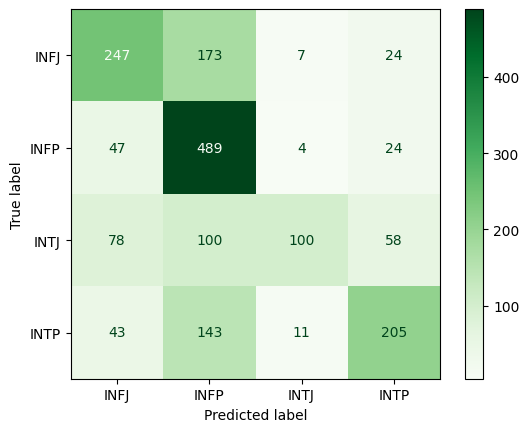

In [53]:

sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'Greens'
);

## Print a classification report

In [57]:
print("Unique values in y_test:", sorted(set(y_test)))
#print("Unique values in y_test_pred:", sorted(set(y_test_pred)))


Unique values in y_test: ['INFJ', 'INFP', 'INTJ', 'INTP']


In [56]:

print(classification_report(y_test, y_test_pred, target_names = ['INFJ', 'INFP', 'INTJ', 'INTP'], zero_division = 0))

              precision    recall  f1-score   support

        INFJ       0.60      0.55      0.57       451
        INFP       0.54      0.87      0.67       564
        INTJ       0.82      0.30      0.44       336
        INTP       0.66      0.51      0.58       402

    accuracy                           0.59      1753
   macro avg       0.65      0.56      0.56      1753
weighted avg       0.64      0.59      0.58      1753

